# 基于决策树的泰坦尼克号幸存者预测实验
本实验将演示如何使用决策树和逻辑回归模型对泰坦尼克号乘客幸存情况进行分类预测，包括数据读取、分析、预处理、建模、评估及结论。

## 1. 读取数据
数据集文件名为 `titanic.csv`，位于当前目录。

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv',index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. 描述性分析与可视化分析

In [2]:
# 查看数据的统计描述
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
# 查看缺失值
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

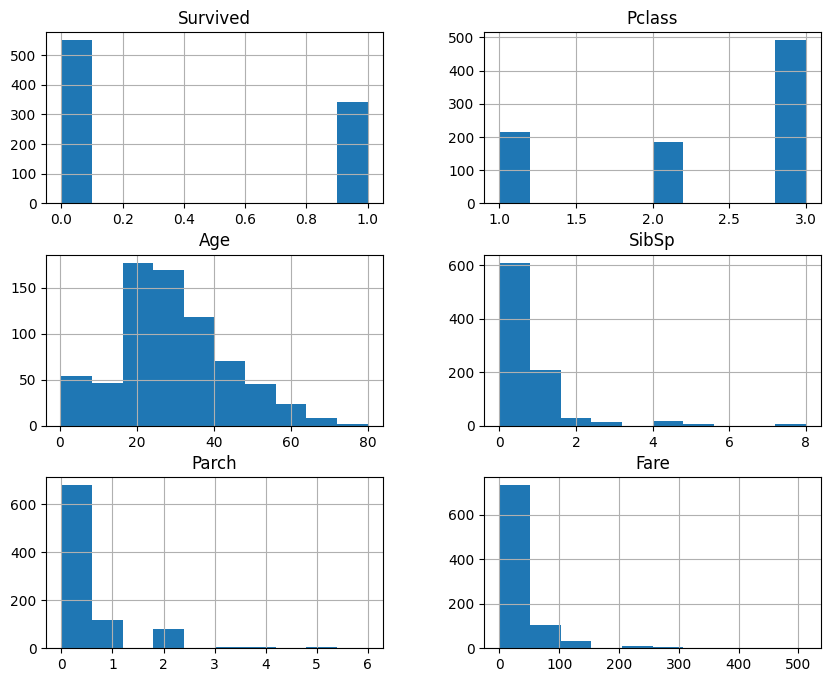

In [4]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,8))
plt.show()

## 3. 数据预处理

In [5]:
# 去掉无关字段
df = df.drop(['Name','Ticket','Cabin'],axis=1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [6]:
# 填充Age缺失值
mean_age = df['Age'].mean()
tmp = df['Age'].copy()
tmp[df.Age.isnull()] = mean_age
df['Age_fill'] = tmp
del tmp
df = df.drop(['Age'],axis=1)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Age_fill'],
      dtype='object')

In [7]:
# 使用LabelEncoder将离散变量转换为编码
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_sex = le.fit(df['Sex'])
df['Sex'] = df_sex.transform(df['Sex'])
df = df.dropna()
df_embarked = le.fit(df['Embarked'])
df['Embarked'] = df_embarked.transform(df['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int64  
 7   Age_fill  889 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


In [8]:
# 划分自变量和因变量
X = df.loc[:,df.columns!='Survived']
y = df.loc[:,df.columns=='Survived']
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y)
X_tr.shape,X_ts.shape

((666, 7), (223, 7))

## 4. 建立模型

In [9]:
# 建立决策树模型
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_tr,y_tr)
# 建立逻辑回归模型
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(class_weight='balanced')
log.fit(X_tr,y_tr.values.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 5. 模型预测与评估

In [10]:
# 对测试集预测，查看混淆矩阵
y_dct_pred = dtc.predict(X_ts)
y_log_pred = log.predict(X_ts)
# 查看决策树模型混淆矩阵
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_ts,y_dct_pred)

array([[111,  25],
       [ 29,  58]])

In [11]:
# 查看逻辑回归模型混淆矩阵
confusion_matrix(y_ts,y_log_pred)

array([[104,  32],
       [ 28,  59]])

In [12]:
# 打印决策树模型混淆矩阵评分
print(classification_report(y_ts,y_dct_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       136
           1       0.70      0.67      0.68        87

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.76      0.76      0.76       223



In [13]:
# 打印逻辑回归模型混淆矩阵评分
print(classification_report(y_ts,y_log_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       136
           1       0.65      0.68      0.66        87

    accuracy                           0.73       223
   macro avg       0.72      0.72      0.72       223
weighted avg       0.73      0.73      0.73       223



In [14]:
# 使用5折交叉验证计算决策树模型预测准确率
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtc,X,y,cv=5,scoring='accuracy')
scores.mean()

np.float64(0.7705833809433125)

In [15]:
# 使用5折交叉验证计算逻辑回归模型预测准确率
scores = cross_val_score(log,X,y,cv=5,scoring='accuracy')
scores.mean()

C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\saurl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

np.float64(0.7750460229797499)

## 6. 实验结论
1. 本试验中，决策树模型在测试集上f1-score得分请见上方输出。
2. 本试验中，逻辑回归模型在测试集上f1-score得分请见上方输出，略高/低于决策树模型。
3. 5折交叉验证显示，决策树模型准确率请见上方输出。
4. 5折交叉验证显示，逻辑回归模型准确率请见上方输出。
5. 综上，本试验中，逻辑回归模型和决策树模型差异不大。